In [1]:
# Importing pandas to perform operations using DataFrames 
import pandas as pd  
import os

# Importing numpy to perform Matrix operations 
import numpy as np

# Importing matplotlib to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the following libraries for preprocessing
from sklearn.preprocessing import StandardScaler

# Importing the library for PCA
from sklearn.decomposition import PCA

In [2]:
# importing Prostate data set
data = os.chdir(r"C:\Users\CC\Downloads")
data = pd.read_csv('prostate.txt',sep = '\t',index_col = 0)

In [3]:
data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,NaN
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,NaN
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,NaN
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,NaN
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,NaN
...,...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,NaN
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,NaN
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,NaN
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,NaN


In [4]:
# dropping the column 'train'
data=data.drop(columns=["train"])
data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


In [5]:
# to know the information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 7.6 KB


In [6]:
# to know the description
data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [7]:
# assigning a copy of the data
data1 = data.copy()
data1

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


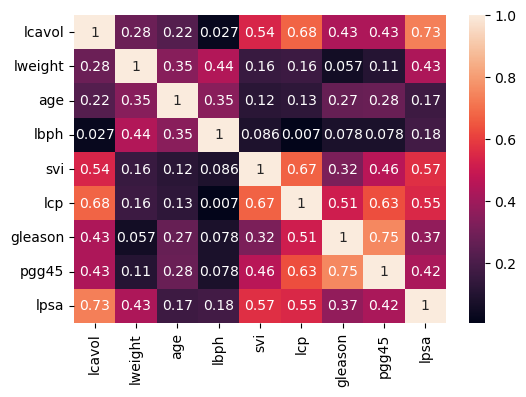

In [8]:
# heatmap for better inference
plt.figure(figsize=(6,4))
sns.heatmap(np.abs(data1.corr()),annot= True)
plt.show()

In [9]:
# Sort the columns 
input_columns = list(data1.iloc[:,:8].columns)
input_columns.sort()
input_data=data1[input_columns]
input_data.head()

,age,gleason,lbph,lcavol,lcp,lweight,pgg45,svi
1,50,6,-1.386294,-0.579818,-1.386294,2.769459,0,0
2,58,6,-1.386294,-0.994252,-1.386294,3.319626,0,0
3,74,7,-1.386294,-0.510826,-1.386294,2.691243,20,0
4,58,6,-1.386294,-1.203973,-1.386294,3.282789,0,0
5,62,6,-1.386294,0.751416,-1.386294,3.432373,0,0


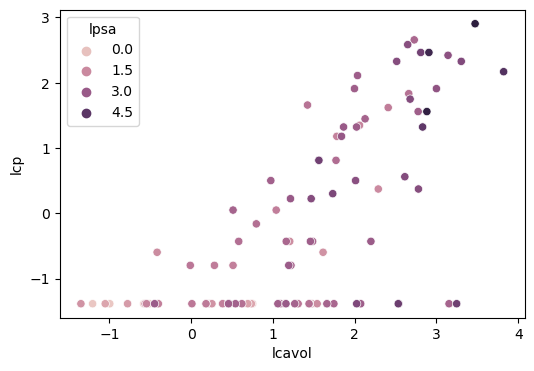

In [10]:
plt.subplots(figsize=(6,4))
sns.scatterplot(x='lcavol', y='lcp', hue='lpsa', data=data1)
plt.show()

In [11]:
# Scaling data using (x-mu)
scaler = StandardScaler(with_std=False)
input_data = scaler.fit_transform(input_data)
input_data = pd.DataFrame(input_data,columns=input_columns)
input_data.head()

,age,gleason,lbph,lcavol,lcp,lweight,pgg45,svi
0,-13.865979,-0.752577,-1.48665,-1.929828,-1.206929,-0.859484,-24.381443,-0.216495
1,-5.865979,-0.752577,-1.48665,-2.344262,-1.206929,-0.309317,-24.381443,-0.216495
2,10.134021,0.247423,-1.48665,-1.860835,-1.206929,-0.937700,-4.381443,-0.216495
3,-5.865979,-0.752577,-1.48665,-2.553982,-1.206929,-0.346154,-24.381443,-0.216495
4,-1.865979,-0.752577,-1.48665,-0.598593,-1.206929,-0.196570,-24.381443,-0.216495


In [12]:
u, s, vt = np.linalg.svd(input_data, full_matrices=True)#decomposing using SVD
exp_var=s**2/np.sum(s**2)*100# Explained variance by each eigen value/PC
pc=data1[input_columns].dot(vt.T) # Rotating and transforming from sample space to feature space
pc.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']
pc['lpsa']= data1.lpsa
pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,lpsa
1,3.939828,49.691257,2.439292,4.219793,0.409226,4.930916,3.837513,-0.376540,-0.430783
2,4.553974,57.647053,2.594104,4.801395,-0.019049,4.828975,4.328580,-0.303187,-0.162519
3,25.744606,71.995149,3.087569,6.030235,0.240218,5.522762,3.692839,-0.410587,-0.162519
4,4.550095,57.642798,2.493365,4.906068,-0.171295,4.856692,4.320945,-0.317192,-0.162519
5,4.896301,61.654440,3.623985,4.187293,1.153869,4.641523,4.166540,-0.209250,0.371564


In [13]:
exp_var

array([9.34850309e+01, 5.97407213e+00, 2.29917376e-01, 2.05144759e-01,
       5.57711461e-02, 2.61499680e-02, 1.41613378e-02, 9.75236216e-03])

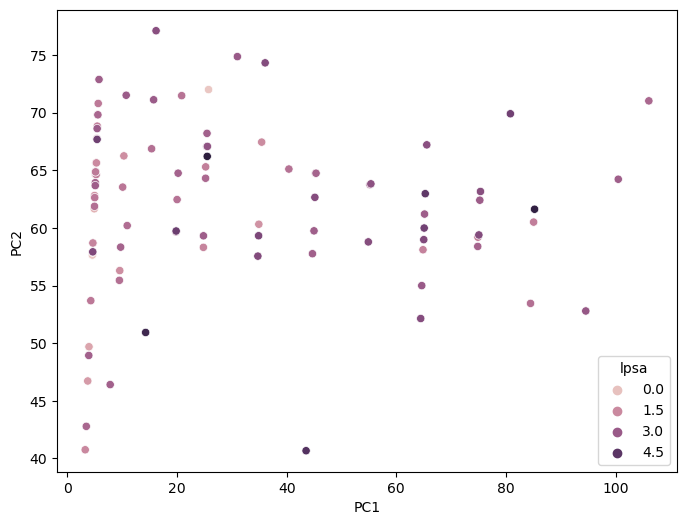

In [14]:
plt.subplots(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='lpsa', data=pc)
plt.show()

In [15]:
# computing covariance using scaled data (renamed the data as 'input_data')
covariance_matrix = input_data.cov()
print (covariance_matrix)

               age    gleason      lbph     lcavol        lcp   lweight  \
age      55.429768   1.445662  3.782507   1.974374   1.329038  1.109872   
gleason   1.445662   0.521478  0.081531   0.368041   0.519836  0.017598   
lbph      3.782507   0.081531  2.104840   0.046767  -0.014199  0.274886   
lcavol    1.974374   0.368041  0.046767   1.389157   1.112920  0.141645   
lcp       1.329038   0.519836 -0.014199   1.112920   1.955102  0.098562   
lweight   1.109872   0.017598  0.274886   0.141645   0.098562  0.183536   
pgg45    57.978737  15.314111  3.210474  14.415458  24.905125  1.297148   
svi       0.362650   0.095790 -0.051560   0.262927   0.389643  0.027559   

              pgg45       svi  
age       57.978737  0.362650  
gleason   15.314111  0.095790  
lbph       3.210474 -0.051560  
lcavol    14.415458  0.262927  
lcp       24.905125  0.389643  
lweight    1.297148  0.027559  
pgg45    795.467569  5.343643  
svi        5.343643  0.171392  


In [16]:
# Computing Eigen values and Eigen vectors of the Covariance Matrix
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix.values)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])for i in range(len(eig_vals))]
eig_pairs

[(801.375037848983,
  array([-0.07759196, -0.01921785, -0.00437097, -0.01819609, -0.03120309,
         -0.00172942, -0.99611165, -0.00670193])),
 (51.211110793911466,
  array([-0.99396418, -0.00496412, -0.07161742, -0.01676692,  0.01207157,
         -0.02005183,  0.07779   ,  0.0011399 ])),
 (1.9709042611859668,
  array([-0.04645505, -0.0369133 ,  0.69418215, -0.4853577 , -0.50994461,
          0.02849948,  0.02696364, -0.13204399])),
 (1.7585477339039797,
  array([-0.05759953,  0.03619372,  0.70546965,  0.47484827,  0.49497123,
          0.13811765, -0.02431024,  0.08683327])),
 (0.47808300314023316,
  array([-0.02064811,  0.1213562 , -0.01346506,  0.71529923, -0.67927105,
          0.06062604,  0.00802914, -0.08867296])),
 (0.12139422225382497,
  array([-0.01048862,  0.24693417, -0.11103886, -0.12996657, -0.02008447,
          0.94719104, -0.00284145,  0.11004653])),
 (0.08359947594181404,
  array([-0.00135676,  0.10968311,  0.04638014, -0.04135408, -0.16408958,
         -0.14474989,

In [17]:
#abs - absolute value
eig_pairs.sort(key = lambda x: x[0], reverse=True)
# sort eig_pairs in descending order based on the eigen values
#false for ascending orderprint('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

801.375037848983
51.211110793911466
1.9709042611859668
1.7585477339039797
0.47808300314023316
0.22416349824381712
0.12139422225382497
0.08359947594181404


In [18]:
# setting threshold as '95% variance'  
threshold = 0.95
# Computing number of PCS required to captured specified variance
print('Explained variance in percentage:\n')
cumulative_variance = 0.0
count = 0
eigv_sum = np.sum(eig_vals)
for i,j in enumerate(eig_pairs):
    variance_explained = (j[0]/eigv_sum).real
    print('eigenvalue {}: {}'.format(i+1, variance_explained*100 ))
    cumulative_variance += variance_explained
    count = count+1
    if (cumulative_variance>=threshold):
        break
        print('\nCumulative variance=',cumulative_variance*100)

Explained variance in percentage:

eigenvalue 1: 93.4850309245127
eigenvalue 2: 5.974072126201723


In [19]:
print('Total no. of eig vecs =',len(eig_vecs),'\nselected no. of eig vecs =',count)

Total no. of eig vecs = 8 
selected no. of eig vecs = 2


In [20]:
# select required PCs based on the count  - projection matrix w=d*k
reduced_dimension = np.zeros((len(eig_vecs),count))
for i in range(count):
    reduced_dimension[:,i]= eig_pairs[i][1]
# Projecting the scaled data onto the reduced space (using eigen vectors)
projected_data = input_data.values.dot(reduced_dimension)
projected_dataframe = pd.DataFrame(projected_data,columns=['PC1','PC2'])
projected_dataframe_with_class_info = pd.concat([projected_dataframe,data1.lpsa],axis=1)

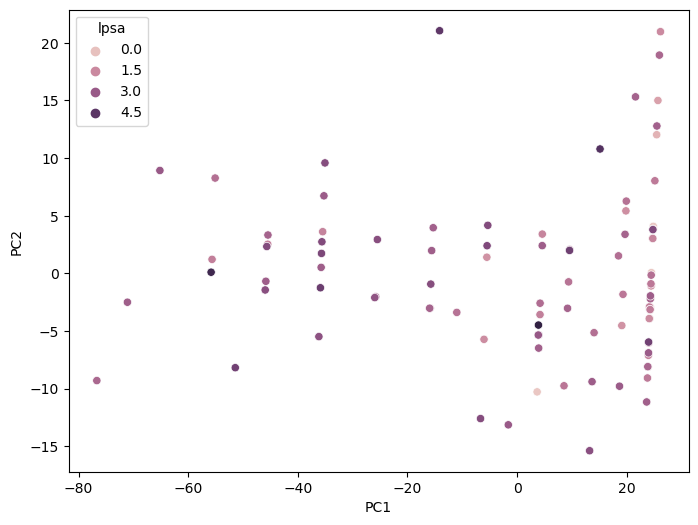

In [22]:
plt.subplots(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='lpsa', data=projected_dataframe_with_class_info)
plt.show()

In [23]:
# Choosing the extent of variance to be covered by the PCs
PCA_Sklearn = PCA(n_components=0.95)
# Transforming the cancer input_columns
Projected_data_sklearn= PCA_Sklearn.fit_transform(data1.iloc[:,:8])
# Storing the PCs in the data frame
Projected_data_sklearn_df = pd.DataFrame(Projected_data_sklearn,
                                         columns=['PC1','PC2'])

In [24]:
# Storing the PCs in the data frame along with class label
Projected_data_sklearn_df_with_class_info=pd.concat([Projected_data_sklearn_df,data1.lpsa],axis=1)
print('Explained variance :\n')
print(PCA_Sklearn.explained_variance_ratio_)

Explained variance :

[0.93485031 0.05974072]


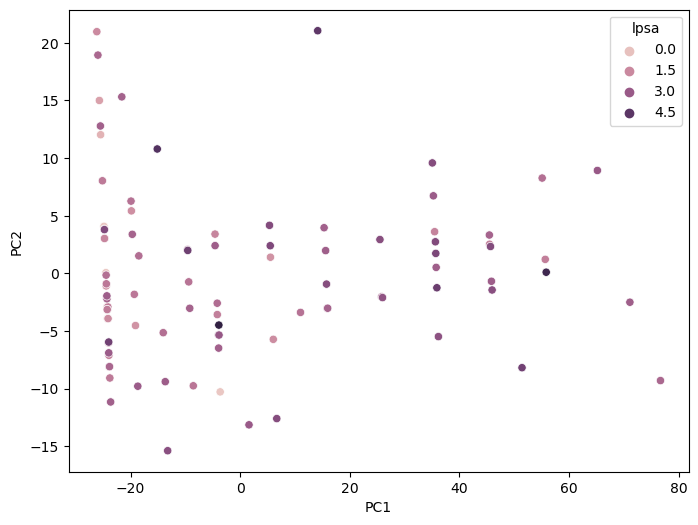

In [25]:
plt.subplots(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='lpsa', data=Projected_data_sklearn_df_with_class_info)
plt.show()

# LINEAR REGRESSION MODELS

model1 - lpsa ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [27]:
# Separating input and output features

x1 = pc.filter(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], axis = 1)
y1 = pc.filter(['lpsa'], axis = 1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(67, 8) (30, 8) (67, 1) (30, 1)


In [29]:
# Model evaluation

def rmse(test_y, predicted_y):
  rmse_test = np.sqrt(mean_squared_error(test_y, predicted_y))
  base_pred = np.repeat(np.mean(test_y), len(test_y)) # For calculating base RMSE
  rmse_base = np.sqrt(mean_squared_error((test_y), base_pred))
  values = {'RMSE-test from model': rmse_test,'Base RMSE': rmse_base}
  return values

In [30]:
# Model building

x_train2 = sm.add_constant(x_train)
model_lin1 = sm.OLS(y_train, x_train2)
results1 = model_lin1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     15.03
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.17e-11
Time:                        00:29:59   Log-Likelihood:                -66.891
No. Observations:                  67   AIC:                             151.8
Df Residuals:                      58   BIC:                             171.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8442      1.580      0.534      0.5

In [31]:
# Model prediction

x_test = sm.add_constant(x_test)
cancer_predictions_lin1_test = results1.predict(x_test)

print(rmse(y_test, cancer_predictions_lin1_test))

# Predicting the model over train data for diagnostics

cancer_predictions_lin1_train = results1.predict(x_train2)

{'RMSE-test from model': 0.7207162398182965, 'Base RMSE': 1.1361708856722057}


C:\Users\CC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Text(0.5, 1.0, 'Residual plot')

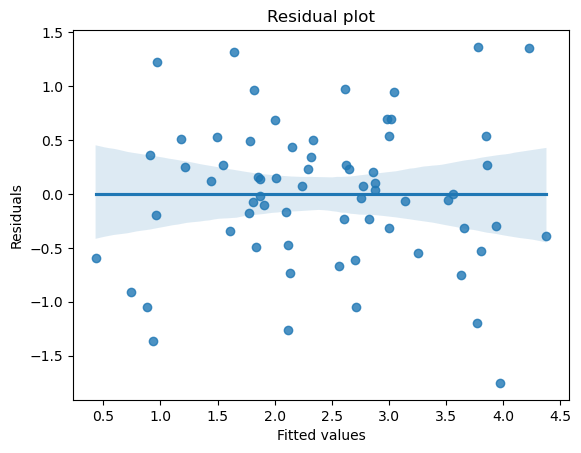

In [32]:
residuals = y_train.iloc[:, 0] - cancer_predictions_lin1_train

# Residual plot

sns.regplot(x = cancer_predictions_lin1_train, y = residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

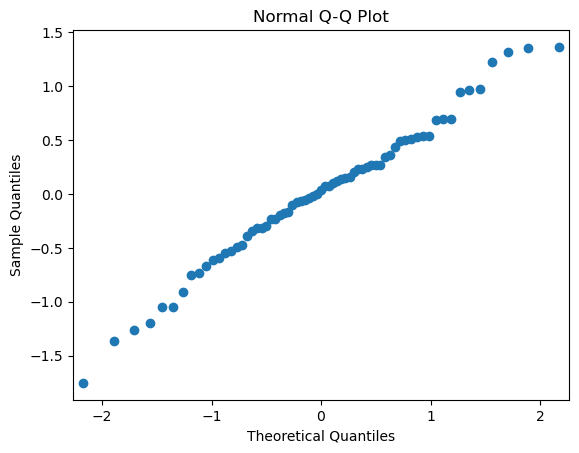

In [33]:
# Q-Q plot

sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")

model2 - lpsa ~ PC1 + PC2 

In [34]:
# Separating input and output features

x2 = pc.filter(["PC1", "PC2"], axis = 1)
y2 = pc.filter(['lpsa'], axis = 1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(67, 2) (30, 2) (67, 1) (30, 1)


In [36]:
# Model evaluation

def rmse(test_y, predicted_y):
  rmse_test = np.sqrt(mean_squared_error(test_y, predicted_y))
  base_pred = np.repeat(np.mean(test_y), len(test_y)) # For calculating base RMSE
  rmse_base = np.sqrt(mean_squared_error((test_y), base_pred))
  values = {'RMSE-test from model': rmse_test,'Base RMSE': rmse_base}
  return values

In [37]:
# Model building

x_train2 = sm.add_constant(x_train)
model_lin2 = sm.OLS(y_train, x_train2)
results2 = model_lin2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     5.352
Date:                Sun, 12 Mar 2023   Prob (F-statistic):            0.00709
Time:                        00:30:00   Log-Likelihood:                -99.313
No. Observations:                  67   AIC:                             204.6
Df Residuals:                      64   BIC:                             211.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4805      1.193      1.240      0.2

In [38]:
# Model prediction

x_test = sm.add_constant(x_test)
cancer_predictions_lin2_test = results2.predict(x_test)

print(rmse(y_test, cancer_predictions_lin2_test))

# Predicting the model over train data for diagnostics

cancer_predictions_lin2_train = results2.predict(x_train2)

{'RMSE-test from model': 0.9846008543582992, 'Base RMSE': 1.1361708856722057}


C:\Users\CC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Text(0.5, 1.0, 'Residual plot')

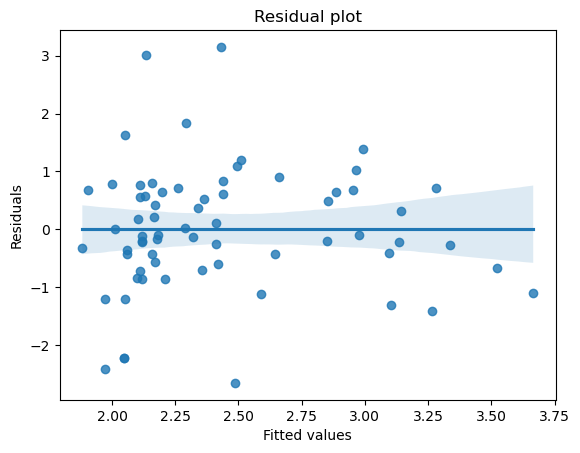

In [39]:
residuals = y_train.iloc[:, 0] - cancer_predictions_lin2_train

# Residual plot

sns.regplot(x = cancer_predictions_lin2_train, y = residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

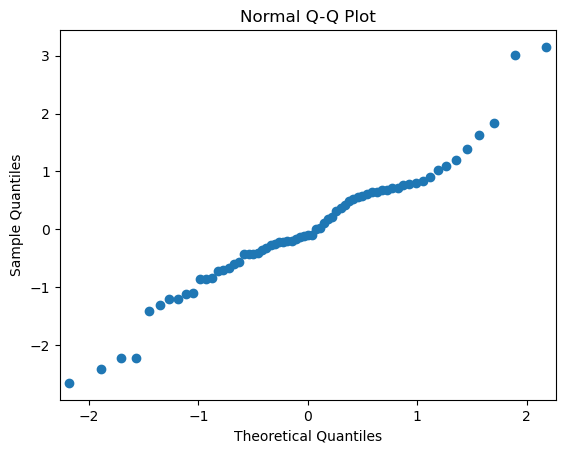

In [40]:
# Q-Q plot

sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")

model3 - lpsa ~ PC1+PC2+PC3+PC4+PC5+PC6

In [41]:
# Separating input and output features
x2 = pc.filter(['PC1','PC2','PC3','PC4','PC5','PC6'], axis = 1)
y2 = pc.filter(['lpsa'], axis = 1)

In [42]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67, 6) (30, 6) (67, 1) (30, 1)


In [43]:
# model building
X_train2 = sm.add_constant(X_train)
model_lin2 = sm.OLS(y_train, X_train2)
results2 = model_lin2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     16.31
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           4.93e-11
Time:                        00:30:01   Log-Likelihood:                -72.086
No. Observations:                  67   AIC:                             158.2
Df Residuals:                      60   BIC:                             173.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1509      1.318      2.391      0.0

In [44]:
# Model prediction

X_test = sm.add_constant(X_test)
data_predictions_lin2_test = results2.predict(X_test)

print(rmse(y_test, data_predictions_lin2_test))

# Predicting the model over train data for diagnostics

data_predictions_lin2_train = results2.predict(X_train2)

{'RMSE-test from model': 0.7900578725077045, 'Base RMSE': 1.1361708856722057}


C:\Users\CC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Text(0.5, 1.0, 'Residual plot')

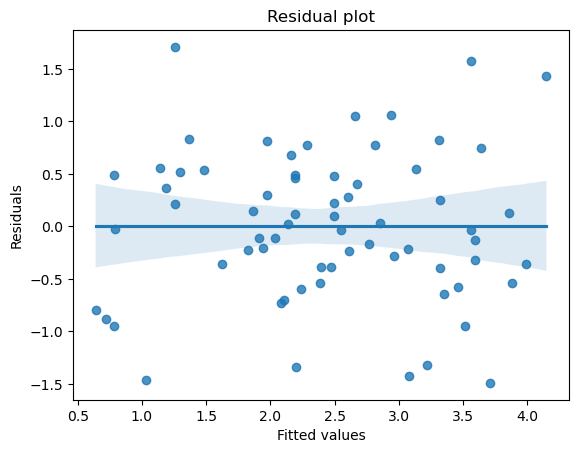

In [45]:
residuals = y_train.iloc[:, 0] - data_predictions_lin2_train

# Residual plot

sns.regplot(x = data_predictions_lin2_train, y = residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

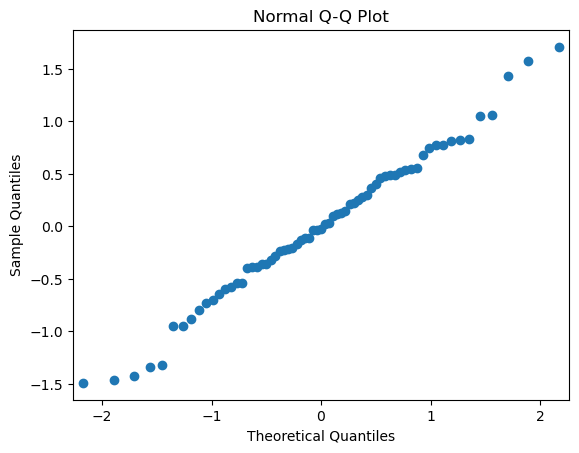

In [46]:
sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")